In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import data
housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = housing.load_data()

#Shuffle data
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

train_data.shape
test_data.shape
train_data[0]

(404, 13)

(102, 13)

array([7.8750e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01,
       6.7820e+00, 4.1100e+01, 3.7886e+00, 5.0000e+00, 3.9800e+02,
       1.5200e+01, 3.9387e+02, 6.6800e+00])

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head(5)
train_labels[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


array([32. , 27.5, 32. , 23.1, 50. , 20.6, 22.6, 36.2, 21.8, 19.5])

In [4]:
#Normalize features
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean)/std
test_data = (test_data - mean)/std
train_data[0]

array([-0.39725269,  1.41205707, -1.12664623, -0.25683275, -1.027385  ,
        0.72635358, -1.00016413,  0.02383449, -0.51114231, -0.04753316,
       -1.49067405,  0.41584124, -0.83648691])

In [5]:
#Build model + compile
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

model = build_model();
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Display train progress by print dot each epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
        
#Train model
EPOCHS = 500

history = model.fit(train_data,
                    train_labels,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

dict_keys(['loss', 'val_loss', 'mean_absolute_error', 'val_mean_absolute_error'])

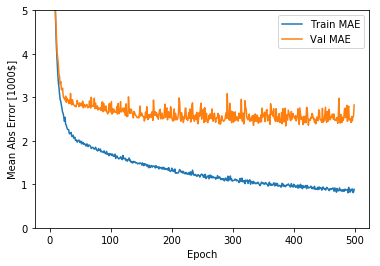

In [7]:
#Plot training progress

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train MAE')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label='Val MAE')
    plt.legend()
    plt.ylim([0,5])

plot_history(history);
history.history.keys()  


....................................................................................................
..............................................................................

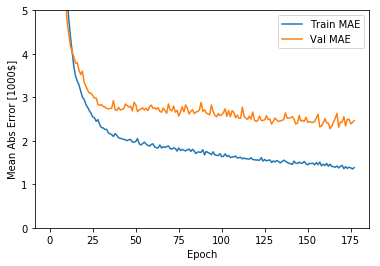

In [8]:
#Automatic choose epochs
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data,
                    train_labels,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [9]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing data set MAE: ${:7.2f}".format(mae*1000))

Testing data set MAE: $2381.91
